   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


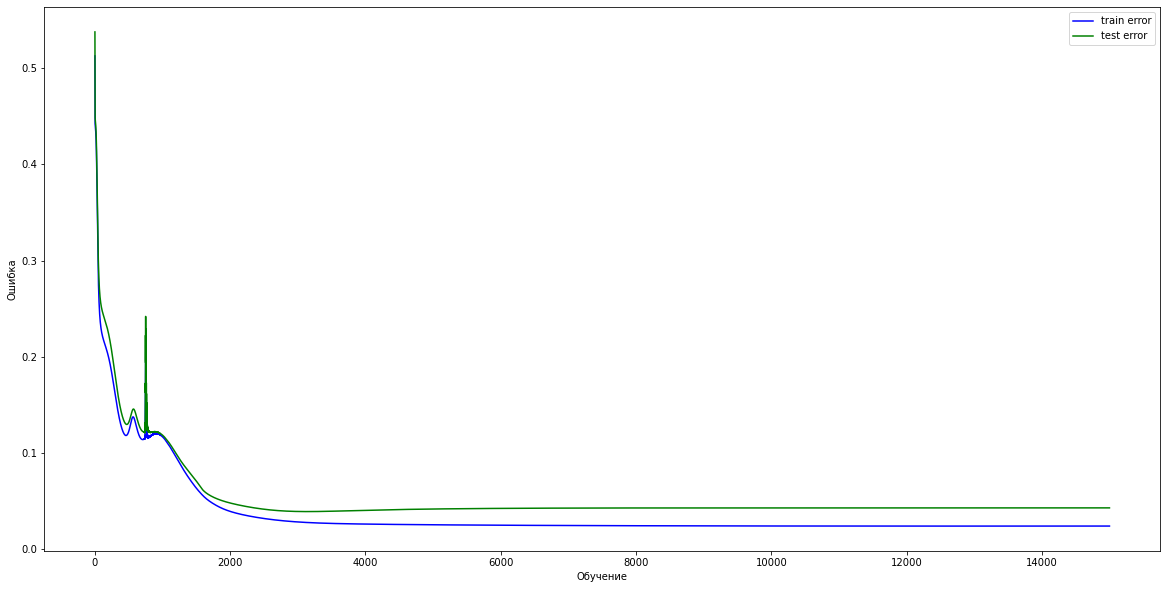

Точность нейронной сети 97.64%
Точность нейронной сети тестовой выборке95.75%


In [10]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)



### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []
errors_test = []

# процесс обучения
for i in range(15000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
    layer0_test = X_test
    layer1_test = sigmoid(np.dot(layer0_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer2_error_test = y_test - layer2_test
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    error_test = np.mean(np.abs(layer2_error_test))
    
    errors.append(error)
    errors_test.append(error_test)
    
    accuracy = (1 - error) * 100
    accuracy_test = (1 - error_test) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize =(20,10))
plt.plot(errors, 'b', label='train error')
plt.plot(errors_test, 'g', label='test error')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
print("Точность нейронной сети тестовой выборке" + str(round(accuracy_test,2)) + "%")

При увеличении  learning rate точность почему то падает, видно застреваем в локальном минимуме. Кол-во итераций нужно тормозить на 5000, как видно из графика ошибка на тесте растет, идет переобучение.

w0: [[-0.51593588 -0.64221699 -0.90557712 -0.61961505 -0.16429336 -0.86558934
   0.31731396  0.17408598  0.05363748  0.40428876]
 [-0.4999575  -0.10014377 -0.8273917  -0.21747191  0.51205087  0.16798853
   0.01250718  0.86017721  0.25334105 -0.90483995]
 [-0.68772488 -0.8776595   0.89721413 -0.60408793 -0.13252028 -0.63108783
  -0.70241615 -0.89925122 -0.90421616 -0.96000726]
 [ 0.09599369  0.62949809  0.38370026 -0.95514086  0.02400659 -0.11398779
  -0.68786138  0.95532652  0.48793714 -0.47914532]]
w1: [[ 0.093579   -0.76004048  0.45300854]
 [-0.31398173 -0.8858532   0.54954047]
 [-0.21971266 -0.04099446 -0.09104784]
 [ 0.15643874  0.99159241  0.66042406]
 [ 0.39064954  0.14033141 -0.72857348]
 [ 0.68099959 -0.25991867  0.23069058]
 [-0.02752286 -0.19861999 -0.16636984]
 [ 0.34240946  0.21709741  0.96301364]
 [ 0.59255475 -0.45306611 -0.60286388]
 [-0.02095392  0.2971086  -0.86407421]]


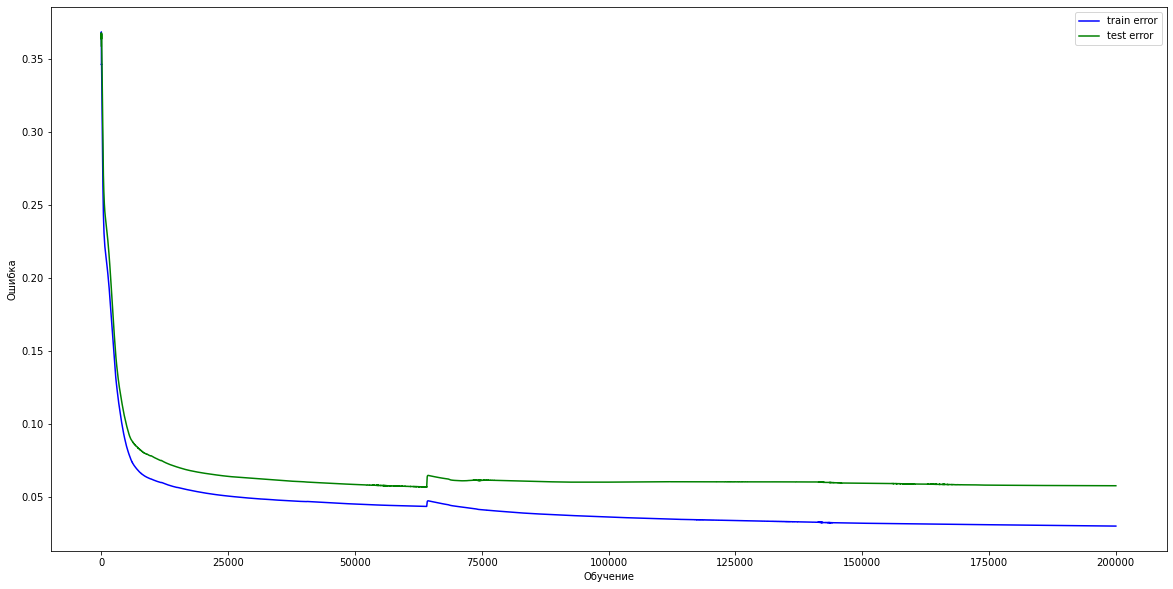

Точность нейронной сети 96.96%
Точность нейронной сети тестовой выборке94.2%


In [14]:
def ReLU(x):
    return x * (x > 0)

def dReLU(z):
    return np.where(z <= 0, 0, 1)

   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 10)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((10, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

print('w0:', w0)
print('w1:', w1)

# скорость обучения (learning rate)
n = 0.0005

# массив для ошибок, чтобы потом построить график
errors = []
errors_test = []

# процесс обучения
for i in range(200000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = ReLU(np.dot(layer0, w0))
    layer2 = ReLU(np.dot(layer1, w1))
    
    layer0_test = X_test
    layer1_test = ReLU(np.dot(layer0_test, w0))
    layer2_test = ReLU(np.dot(layer1_test, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * dReLU(layer2)
    
    layer2_error_test = y_test - layer2_test
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * dReLU(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    error_test = np.mean(np.abs(layer2_error_test))
    
    errors.append(error)
    errors_test.append(error_test)
    
    accuracy = (1 - error) * 100
    accuracy_test = (1 - error_test) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize =(20,10))
plt.plot(errors, 'b', label='train error')
plt.plot(errors_test, 'g', label='test error')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
print("Точность нейронной сети тестовой выборке" + str(round(accuracy_test,2)) + "%")

На релу только увеличив кол-во нейронов удалось пересечь 90 %. Очень сильно зависит от изначального значения весов.
Вновь видим переобучение после ~6000 итераций.